# GRUPO MGR

Integrantes:

* Mariscurrena, Damian
* Giannattasio, Emanuel
* Redchuk, Sergio

# Video de Defensa:

[Video subido a Youtube](https://www.youtube.com/watch?v=VgttAUWULWo&feature=youtu.be)

Se instalan librerias que no estan presentes en el entorno de Colab

In [ ]:
%%capture
!pip install simple_colors duckdb

## Importo librerias


In [3]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score

import numpy as np
import pandas as pd
import duckdb
import simple_colors
from importlib import import_module

import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px


## Funciones a Utilizar

Ha continuacion se crearon una serie de funciones para ser utilizadas.
La documentacion de estas funciones esta en ingles ya que se realizaron con el plugin mintlify de VsCode.

In [5]:
def transform_tags_to_codnu(df):
    """
    The function `transform_tags_to_codnu` takes a DataFrame as input and transforms categorical
    columns into numerical values using label encoding and standardizes numerical columns.

    :param df: The parameter `df` is a pandas DataFrame that contains the data you want to transform
    :return: the transformed dataframe with categorical columns encoded using label encoding
             and numerical columns standardized.
    """
    label_encoder = LabelEncoder()
    scaler = StandardScaler()

    # Separar columnas numéricas y categóricas
    numeric_cols = df.select_dtypes(include=['number']).columns
    categorical_cols = df.select_dtypes(include=['object']).columns

    # Aplicar LabelEncoder a columnas categóricas
    for col_cat in categorical_cols:
        df[col_cat] = label_encoder.fit_transform(df[col_cat])

    ## Aplicar StandardScaler a columnas numéricas
    #for col_num in numeric_cols:
    #    df[col_num] = scaler.fit_transform(df[col_num].values.reshape(-1, 1))

    return df

def proof_model(df_aux, library_chose, model_chose, var_objetive):
    """
    The function `proof_model` trains and tests a selected machine learning model using the specified
    dataset and target variable, and prints the precision, accuracy, and recall scores of the model.

    :param df_aux: The input dataframe containing the data for the model
    :param library_chose: The library chosen for the model. It can be 'sklearn' or 'tensorflow'
    :param model_chose: The parameter "model_chose" is the name of the machine learning model you want
    to use. It can be one of the following: "KNeighborsClassifier", "DecisionTreeClassifier", or
    "RandomForestClassifier"
    :param var_objetive: The variable `var_objetive` represents the target variable or the variable that
    you want to predict. It is the variable that you want your model to learn and make predictions on
    """
    module_model=import_module(library_chose)
    model_class = getattr(module_model, model_chose)
    print(f"\nEl modelo seleccionado es {simple_colors.green(model_chose, ['bold'])} y el atributo "
        f"seleccionado es {simple_colors.blue(var_objetive, ['bold'])} (esta es la variable a predecir).")

    # Separo en X los atributos , en y las etiquetas
    X = df_aux.drop(var_objetive, axis = 1)
    y = df_aux[var_objetive]

    #división en conjunto de entrenamiento y prueba
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

    if  model_chose == 'KNeighborsClassifier':
      model = model_class( metric='euclidean', n_neighbors=87)
    elif model_chose == 'DecisionTreeClassifier':
      model = model_class(criterion='entropy')
    elif model_chose == 'RandomForestClassifier':
      model = model_class(criterion='entropy')

    #Entrenamiento
    model.fit(X_train, y_train)

    #Prueba
    prediccion_model = model.predict(X_test)

    #Mido precision del modelo
    print(f"La precision(precision_score) del modelo {simple_colors.green(model_chose, ['bold'])} es: {round(precision_score(y_test, prediccion_model), 4)}")
    #Mido la exactitud del modelo (accuracy)
    print(f"La exactitud(accuracy) del modelo {simple_colors.green(model_chose, ['bold'])} es: {round(accuracy_score(y_test, prediccion_model),4)}")
    #Mido la sensibilidad del modelo (recall_score)
    print(f"La sensibilidad(recall_score) del modelo {simple_colors.green(model_chose, ['bold'])} es: {round(recall_score(y_test, prediccion_model),4)}")
    #Reporte de clasificación
    print(f"La matriz de clasificacion resultante en este modelo es:\n  {classification_report(y_test, prediccion_model)}")
    #Matriz de confusión
    x_axis_labels = ['no','si'] # labels for x-axis
    y_axis_labels = ['no','si'] # labels for y-axis
    graph_conf_mtx = sns.heatmap(confusion_matrix(y_test, prediccion_model)
                                 , xticklabels=x_axis_labels, yticklabels=y_axis_labels
                                 , annot=True, cmap="crest", fmt='g')
    plt.title(f'Heatmap de la matriz de confusion para el modelo {model_chose}', fontsize = 20)
    plt.show()


def balance_df(df, library_chose, balance_chose, var_objetive):
    """
    The `balance_df` function balances the dataset using the specified library and method, and returns
    the balanced dataset.

    :param df: The input dataframe that you want to balance
    :param library_chose: The library_chose parameter is the name of the library you want to use for
    balancing the dataset. Examples of libraries include 'imblearn.over_sampling' for oversampling
    techniques, 'imblearn.under_sampling' for undersampling techniques, and 'imblearn.combine' for
    combined sampling
    :param balance_chose: The `balance_chose` parameter is used to specify the balancing technique to be
    applied to the dataset. It can take one of the following values:
    :param var_objetive: The `var_objetive` parameter is the variable that you want to balance in your
    dataframe. It is the variable that you want to predict or classify
    :return: a balanced dataframe, where the target variable has been balanced using the specified
    balancing technique.
    """
    ##wrapper to https://imbalanced-learn.org/stable/#
    #over_sampler_balance: balance_df(df_work, 'imblearn.over_sampling', 'SMOTE', 'income-class')
    #under_sampler_balance : balance_df(df_work, 'imblearn.under_sampling', 'RandomUnderSampler', 'income-class')
    #combine_sampler : balance_df(df_work, 'imblearn.combine', 'SMOTEENN', 'income-class')

    module_model=import_module(library_chose)
    balance_class = getattr(module_model, balance_chose)

    print(f"\nEl modelo seleccionado es {simple_colors.green(balance_chose, ['bold'])} y el atributo "
        f"seleccionado es {simple_colors.blue(var_objetive, ['bold'])} (esta es la variable a predecir).")

    X = df.drop(var_objetive, axis = 1) # Variables Predictoras
    y = df[var_objetive]                # Variable a balancear
    balance = balance_class(random_state=123)
    X, y = balance.fit_resample(X, y)
    df_balanced = pd.concat([X, y], axis=1)
    return df_balanced



## Carga del Dataset

Procedemos a cargar el dataset, renombrar sus columnas y colocarlas en mayusculas.



In [6]:
df = pd.read_csv('https://raw.githubusercontent.com/EmaGianna/churn_predict/main/file/WA_Fn-UseC_-Telco-Customer-Churn.csv')
df.columns = ['customer_id','genero','adulto_mayor','pareja','dependientes','tenure','servicio_telefonico',
'multiples_lineas','servicio_internet','seguridad_online','backup_online','proteccion_dispositivo',
'soporte_tecnico','streaming_tv','streaming_movies','contrato','factura_electronica','metodo_pago','cargo_mensual','cargo_total','churn']
df.columns = map(str.upper, df.columns)
df.head(10)

,CUSTOMER_ID,GENERO,ADULTO_MAYOR,PAREJA,DEPENDIENTES,TENURE,SERVICIO_TELEFONICO,MULTIPLES_LINEAS,SERVICIO_INTERNET,SEGURIDAD_ONLINE,...,PROTECCION_DISPOSITIVO,SOPORTE_TECNICO,STREAMING_TV,STREAMING_MOVIES,CONTRATO,FACTURA_ELECTRONICA,METODO_PAGO,CARGO_MENSUAL,CARGO_TOTAL,CHURN
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,Yes
6,1452-KIOVK,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.4,No
7,6713-OKOMC,Female,0,No,No,10,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.9,No
8,7892-POOKP,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
9,6388-TABGU,Male,0,No,Yes,62,Yes,No,DSL,Yes,...,No,No,No,No,One year,No,Bank transfer (automatic),56.15,3487.95,No


Verificamos que las columnas hayan quedado en mayusculas y ademas, verificamos si estas columnas poseen valores nulos.
Como se observa a continuacion, ninguna columna posee valores nulos.

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   CUSTOMER_ID             7043 non-null   object 
 1   GENERO                  7043 non-null   object 
 2   ADULTO_MAYOR            7043 non-null   int64  
 3   PAREJA                  7043 non-null   object 
 4   DEPENDIENTES            7043 non-null   object 
 5   TENURE                  7043 non-null   int64  
 6   SERVICIO_TELEFONICO     7043 non-null   object 
 7   MULTIPLES_LINEAS        7043 non-null   object 
 8   SERVICIO_INTERNET       7043 non-null   object 
 9   SEGURIDAD_ONLINE        7043 non-null   object 
 10  BACKUP_ONLINE           7043 non-null   object 
 11  PROTECCION_DISPOSITIVO  7043 non-null   object 
 12  SOPORTE_TECNICO         7043 non-null   object 
 13  STREAMING_TV            7043 non-null   object 
 14  STREAMING_MOVIES        7043 non-null   

### Analisis Descriptivo de los datos

En la siguiente imagen, verificamos la cantidad de clientes que han solicitado la baja y cuantos no, del total de los 7043 registros que posee el dataset.

In [8]:
# VALORES ABSOLUTOS
query_churn_total = f'SELECT CHURN, count(*) as QTTY FROM df GROUP BY CHURN'
df_churn_total = duckdb.sql(query_churn_total).df()
df_churn_total
fig = px.bar(df_churn_total
             ,x="CHURN"
             ,y="QTTY"
             ,text_auto=True #,text_auto='.2s'
             ,color="CHURN"
             ,width = 800
             ,height = 400
             ,labels={"QTTY": "Cantidad", "CHURN": "Churn"}
             ,title=f"CHURN sobre el total de clientes")
fig.show()

Decidimos ir un paso mas alla y hacer un analisis identico, para cada variables del dataset, con la excepcion de las variables CHURN , que es variable objetivo a predecir, CUSTOMER_ID por tratarse de valores de identificacion unico y las variables CARGO_TOTAL y CARGO_MENSUAL por ser variables cuasi continuas; estas dos ultimas se excluyeron del analisis descriptivos ya que son variables cuasi continuos y no aportaban una visualizacion descriptiva ha considerar.

In [9]:
for col in df.columns:
  if col not in ['CHURN', 'CARGO_TOTAL', 'CARGO_MENSUAL', 'CUSTOMER_ID' ]:
    query = f'SELECT {col}, CHURN, count(*) as QTTY FROM df group by {col}, CHURN order by {col}'
    df_query = duckdb.sql(query).df()
    #print(df_query)
    fig = px.bar(df_query
                 , x=col
                 , y="QTTY"
                 ,text_auto=True #, text_auto='.2s'
                 , color="CHURN"
                 , width = 800
                 , height = 400
                 #, barmode='group'
                 ,labels={"QTTY": "Cantidad", col: f"{col}"}
                 ,title=f"Churn por {col}")
    fig.show()

    print('\n')

## Tratamiento de Datos

#### Creo una copia del dataframe para trabajar sobre el mismo

In [10]:
df_churn = df.copy()

#### Eliminacion y transformacion de columnas que no van a ser utilizadas por el modelo

Realizo la conversion de la variables ADULTO_MAYOR categoricas que vienen como 0 y 1 a variables categoricas( esto es para posterior usar la funcion que codifica las mismas mediante LabelEncoder).
Ademas detectamos, que si bien como se dijo antes , la variables CARGO_TOTAL no posee nulos, algunos registros poseen ' ', decidimos convertilos en 0. Debido a esto, esta variable que era numerica el cargar el dataframe, la reconocia como variable de tipo object(string), por que la convertimos a una variables numerica.

Elimino la columnas CUSTOMER_ID:

* CUSTOMER_ID:  Son valores unico que no aportan absolutamente nada al modelo predictivo, ademas previamente se verifico que los registros eran unicos.


In [11]:
#convierto la variable Si es adulto mayor si o no, para que luego la funcion de labeling no se confunda
diccionario = {0 : 'No', 1 : 'Yes'}
df_churn['ADULTO_MAYOR'] = df_churn['ADULTO_MAYOR'].replace(diccionario)
df_churn['CARGO_TOTAL'] = df_churn['CARGO_TOTAL'].replace(' ', '0')
df_churn['CARGO_TOTAL'] = pd.to_numeric(df_churn['CARGO_TOTAL'])

In [12]:
#df_churn = df_churn.drop(['CUSTOMER_ID', 'CARGO_TOTAL', 'CARGO_MENSUAL'], axis=1)
df_churn = df_churn.drop(['CUSTOMER_ID'], axis=1)

Verificamos que las columnas del dataframe hayan quedado de acuerdo a como las modificamos anteriormente.

In [13]:
df_churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   GENERO                  7043 non-null   object 
 1   ADULTO_MAYOR            7043 non-null   object 
 2   PAREJA                  7043 non-null   object 
 3   DEPENDIENTES            7043 non-null   object 
 4   TENURE                  7043 non-null   int64  
 5   SERVICIO_TELEFONICO     7043 non-null   object 
 6   MULTIPLES_LINEAS        7043 non-null   object 
 7   SERVICIO_INTERNET       7043 non-null   object 
 8   SEGURIDAD_ONLINE        7043 non-null   object 
 9   BACKUP_ONLINE           7043 non-null   object 
 10  PROTECCION_DISPOSITIVO  7043 non-null   object 
 11  SOPORTE_TECNICO         7043 non-null   object 
 12  STREAMING_TV            7043 non-null   object 
 13  STREAMING_MOVIES        7043 non-null   object 
 14  CONTRATO                7043 non-null   

## VEO La TABLA RESULTANTE LUEGO DE EXCEPTUAR Y TRATAR DATOS

In [14]:
df_churn.head(5)

,GENERO,ADULTO_MAYOR,PAREJA,DEPENDIENTES,TENURE,SERVICIO_TELEFONICO,MULTIPLES_LINEAS,SERVICIO_INTERNET,SEGURIDAD_ONLINE,BACKUP_ONLINE,PROTECCION_DISPOSITIVO,SOPORTE_TECNICO,STREAMING_TV,STREAMING_MOVIES,CONTRATO,FACTURA_ELECTRONICA,METODO_PAGO,CARGO_MENSUAL,CARGO_TOTAL,CHURN
0,Female,No,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,No,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,No,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,No,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,No,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


#### Transformo las variables categoricas y numericas

In [15]:
df_churn = transform_tags_to_codnu(df_churn)

Verifico que la transformacion haya sido correcta.

In [16]:
df_churn.head(5)

,GENERO,ADULTO_MAYOR,PAREJA,DEPENDIENTES,TENURE,SERVICIO_TELEFONICO,MULTIPLES_LINEAS,SERVICIO_INTERNET,SEGURIDAD_ONLINE,BACKUP_ONLINE,PROTECCION_DISPOSITIVO,SOPORTE_TECNICO,STREAMING_TV,STREAMING_MOVIES,CONTRATO,FACTURA_ELECTRONICA,METODO_PAGO,CARGO_MENSUAL,CARGO_TOTAL,CHURN
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,29.85,0
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1889.50,0
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,108.15,1
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1840.75,0
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,151.65,1


## ENTRENAMIENTO DE MODELO

A continuacion procederemos a entrenar el modelo de Clasificacion.

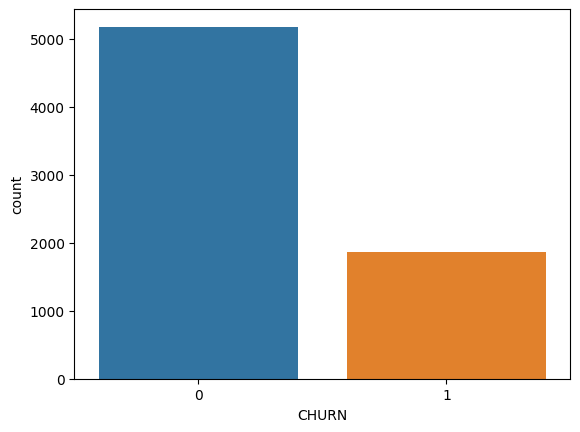

In [18]:
%matplotlib inline
#Verifico Desbalanceo de la variable objetivo
ax = sns.countplot(x='CHURN', data=df_churn)

Luego de conversar con el grupo, hemos decidio avanzar con el modelo Random Forest, debido a que consideramos que es el mejor modelos de clasificacion que se ajusta a esta situacion de clasificacion.


El modelo seleccionado es RandomForestClassifier y el atributo seleccionado es CHURN (esta es la variable a predecir).
La precision(precision_score) del modelo RandomForestClassifier es: 0.6425
La exactitud(accuracy) del modelo RandomForestClassifier es: 0.7856
La sensibilidad(recall_score) del modelo RandomForestClassifier es: 0.4533
La matriz de clasificacion resultante en este modelo es:
                precision    recall  f1-score   support

           0       0.82      0.91      0.86      1546
           1       0.64      0.45      0.53       567

    accuracy                           0.79      2113
   macro avg       0.73      0.68      0.70      2113
weighted avg       0.77      0.79      0.77      2113



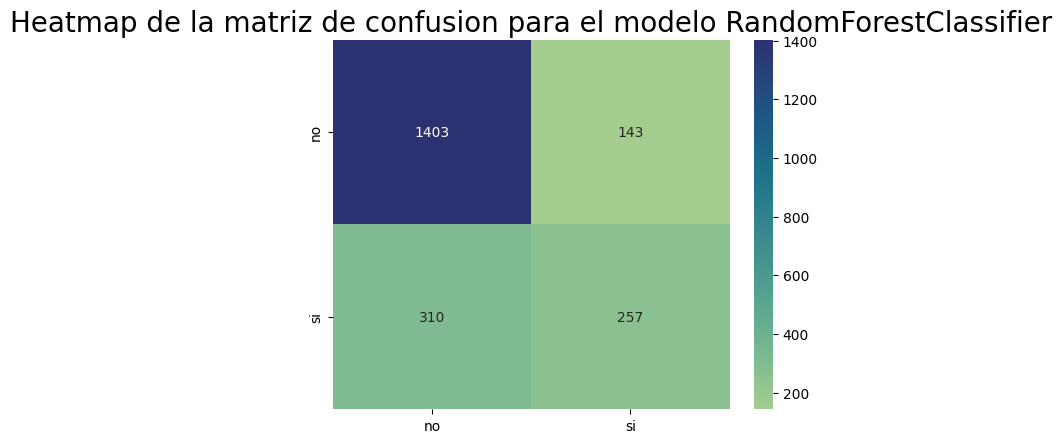

In [19]:
##Random Forest - desbalanceado
proof_model(df_churn, 'sklearn.ensemble', 'RandomForestClassifier', 'CHURN')

Como vemos los indicadores precision_score y accuracy, son aceptables; no obstante el valor recall_score por debajo de un 50% no es aceptable.
Ademas, al ver el reporte de clasificacion para este modelo, vemos que los indicadores son aceptables para la prediccion de aquellos clientes que no dieron la baja (0), es aceptable, no lo son para predecir aquellos clientes que si gestionaron la baja (0) o Churn.
Esto se ver reforzado al visualizar la matriz de confusion, donde observamos el pobre desempeño al detectar las verdaderas posibles bajas.

Por estas razone, es que hemos decidido balancear el modelo y volver a entrenar el mismo como se vera a continuacion.

### Balanceado

Por los resultados obtenidos con los datos sin balancear, es que procedemos a entrenar el modelo con datos balanceados.
Hemos elegido balancearlos mediante el metodo SMOTE(Synthetic Minority Over-sampling Technique), este metodo funciona creando muestras sintéticas de la clase minoritaria mediante la generación de instancias artificiales basadas en los vecinos más cercanos de esa clase. En lugar de replicar las muestras existentes, SMOTE toma una muestra de la clase minoritaria y encuentra sus vecinos más cercanos en el espacio de características. Luego, crea nuevas muestras interpolando entre la muestra original y sus vecinos, generando puntos sintéticos en esa región

#### Balanceo los datos

In [20]:
df_balanceado = balance_df(df_churn, 'imblearn.over_sampling', 'SMOTE', 'CHURN')


El modelo seleccionado es SMOTE y el atributo seleccionado es CHURN (esta es la variable a predecir).


A continuacion comprobamos el balanceo de la variable objetivo

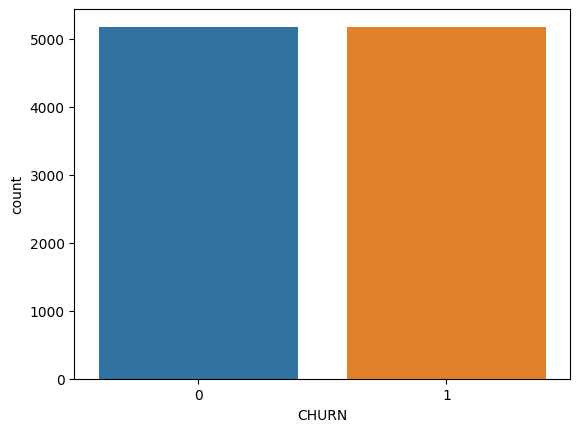

In [21]:
#Verifico Balanceo de la variable objetivo
ax = sns.countplot(x='CHURN', data=df_balanceado)

Volvemos a entrenar el modelo Random Forest, pero esta vez con los datos balanceados


El modelo seleccionado es RandomForestClassifier y el atributo seleccionado es CHURN (esta es la variable a predecir).
La precision(precision_score) del modelo RandomForestClassifier es: 0.8404
La exactitud(accuracy) del modelo RandomForestClassifier es: 0.8473
La sensibilidad(recall_score) del modelo RandomForestClassifier es: 0.8557
La matriz de clasificacion resultante en este modelo es:
                precision    recall  f1-score   support

           0       0.85      0.84      0.85      1560
           1       0.84      0.86      0.85      1545

    accuracy                           0.85      3105
   macro avg       0.85      0.85      0.85      3105
weighted avg       0.85      0.85      0.85      3105



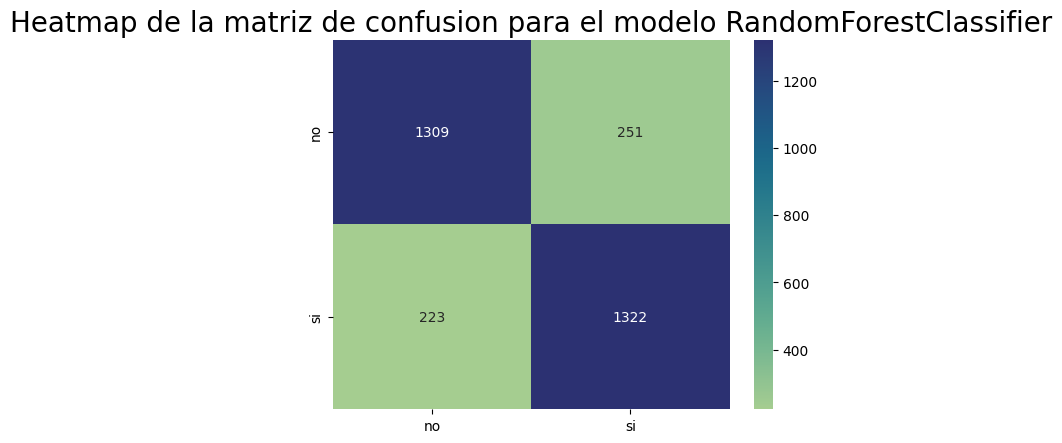

In [22]:
## Random Forest - balanceado
proof_model(df_balanceado, 'sklearn.ensemble', 'RandomForestClassifier', 'CHURN')

Como vemos, en comparacion al modelo entrenado con los datos "desbalanceado", vemos una mejora notoria en los indicadores precision(precision_score),  exactitud(accuracy) y sensibilidad(recall_score), los cuales rondan el 85%.
Tambien verificamos en el reporte de clasificacion esta mejora sustancial, viendo la mejora en la deteccion tanto de los Bajas como de las No bajas. Y finalmente confirmamos, en la matriz de confusion hemos mejorado sustancialmente la deteccion de los correctos positivos de baja.


# CONCLUSIONES

El presente modelo, Random Forest, balanceando la variable objetivo, cumple con la correcta deteccion de clientes propensos a realizar la baja del servicio.